# GROUP 5

***GROUP MEMBERS***

- Lâm Nhựt Thịnh        K194141751
- Đoàn Thị Ngọc Diệu    K194141717
- Nguyễn Tuấn Hưng      K194141723
- Thái Tuấn Kha         K194141725
- Trần Thanh Trúc       K194141755

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn
import scipy as sp

# EDA

In [2]:
df = pd.read_csv("E:\Lam Nhut Thinh\Machine Learning\\data_risk.csv")
df = df.drop("SK_ID_CURR",axis=1)
df

,GENDER,COLLATERAL,OWN_JOB,MARRIED,INCOME,TARGET
0,1,1,0,0,1,0
1,0,0,0,0,2,1
2,1,1,0,0,0,0
3,0,1,0,0,1,1
4,1,1,1,1,1,0
...,...,...,...,...,...,...
9995,0,1,0,0,1,0
9996,0,1,0,0,1,0
9997,1,1,0,0,2,0
9998,0,0,0,0,2,1


***VISUALIZATION***

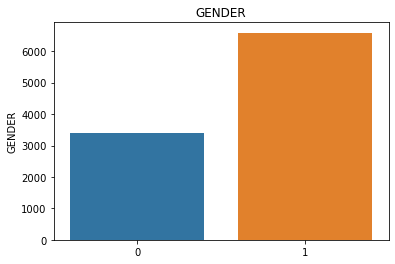

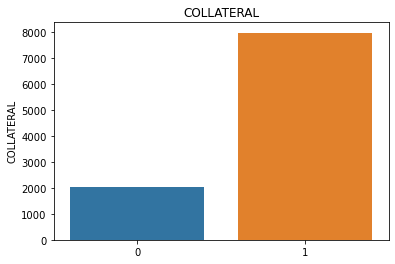

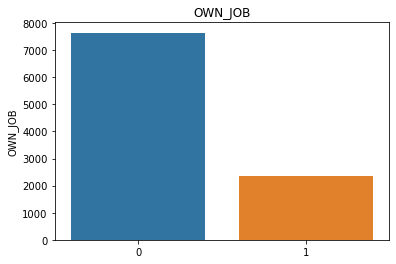

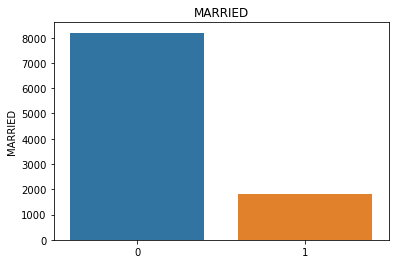

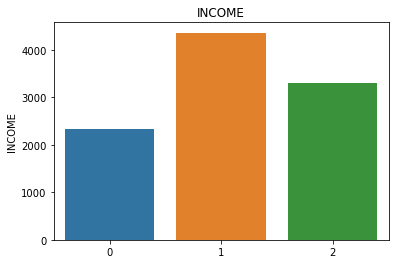

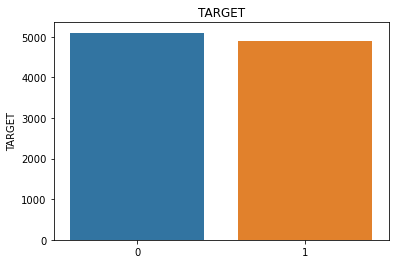

In [3]:
for i in df.columns:
    sns.barplot(x = df[i].unique().tolist(),y = df[i].value_counts())
    plt.title(i.upper())
    plt.show()

***CORRELATION***

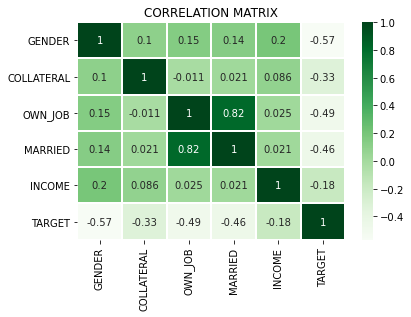

In [4]:
sns.heatmap(df.corr(),annot=True,cmap = 'Greens',linewidths=1)
plt.title('CORRELATION MATRIX')
plt.show()

***PREDICTIVE POWER SCORE***

In [5]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Greens", linewidths=0.5, annot=True)
    ax.set_title("Predictive Power Score matrix".upper())
    ax.set_xlabel("feature".upper())
    ax.set_ylabel("target".upper())
    return ax

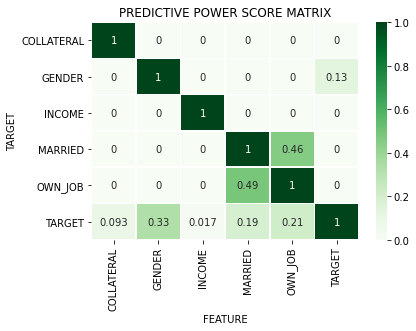

In [6]:
import ppscore as pps
heatmap(pps.matrix(df))

# RESULTS

In [7]:
y = df['TARGET'].values.reshape(-1,1)
X = df.drop(columns=['TARGET'])
features = df.drop(['TARGET'], axis=1).columns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

***DECISION TREE CLASSIFIER***

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1020
           1       0.86      1.00      0.92       980

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

Decision Tree Accuracy: 92.0%


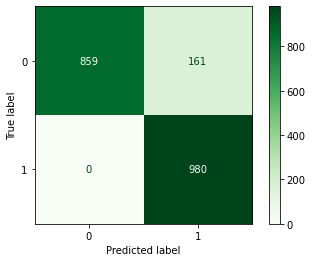

In [8]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


my_tree = DecisionTreeClassifier(criterion="entropy",max_depth=4)
model = my_tree.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(my_tree, X_test, y_test,cmap='Greens')
print(classification_report(y_test, y_pred))
print(f'Decision Tree Accuracy: {100*round(accuracy_score(y_test, y_pred),2)}%')

In [9]:
importance_dt = my_tree.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 
                                        'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
0,GENDER,0.368977
2,OWN_JOB,0.327338
1,COLLATERAL,0.248702
3,MARRIED,0.047406
4,INCOME,0.007577


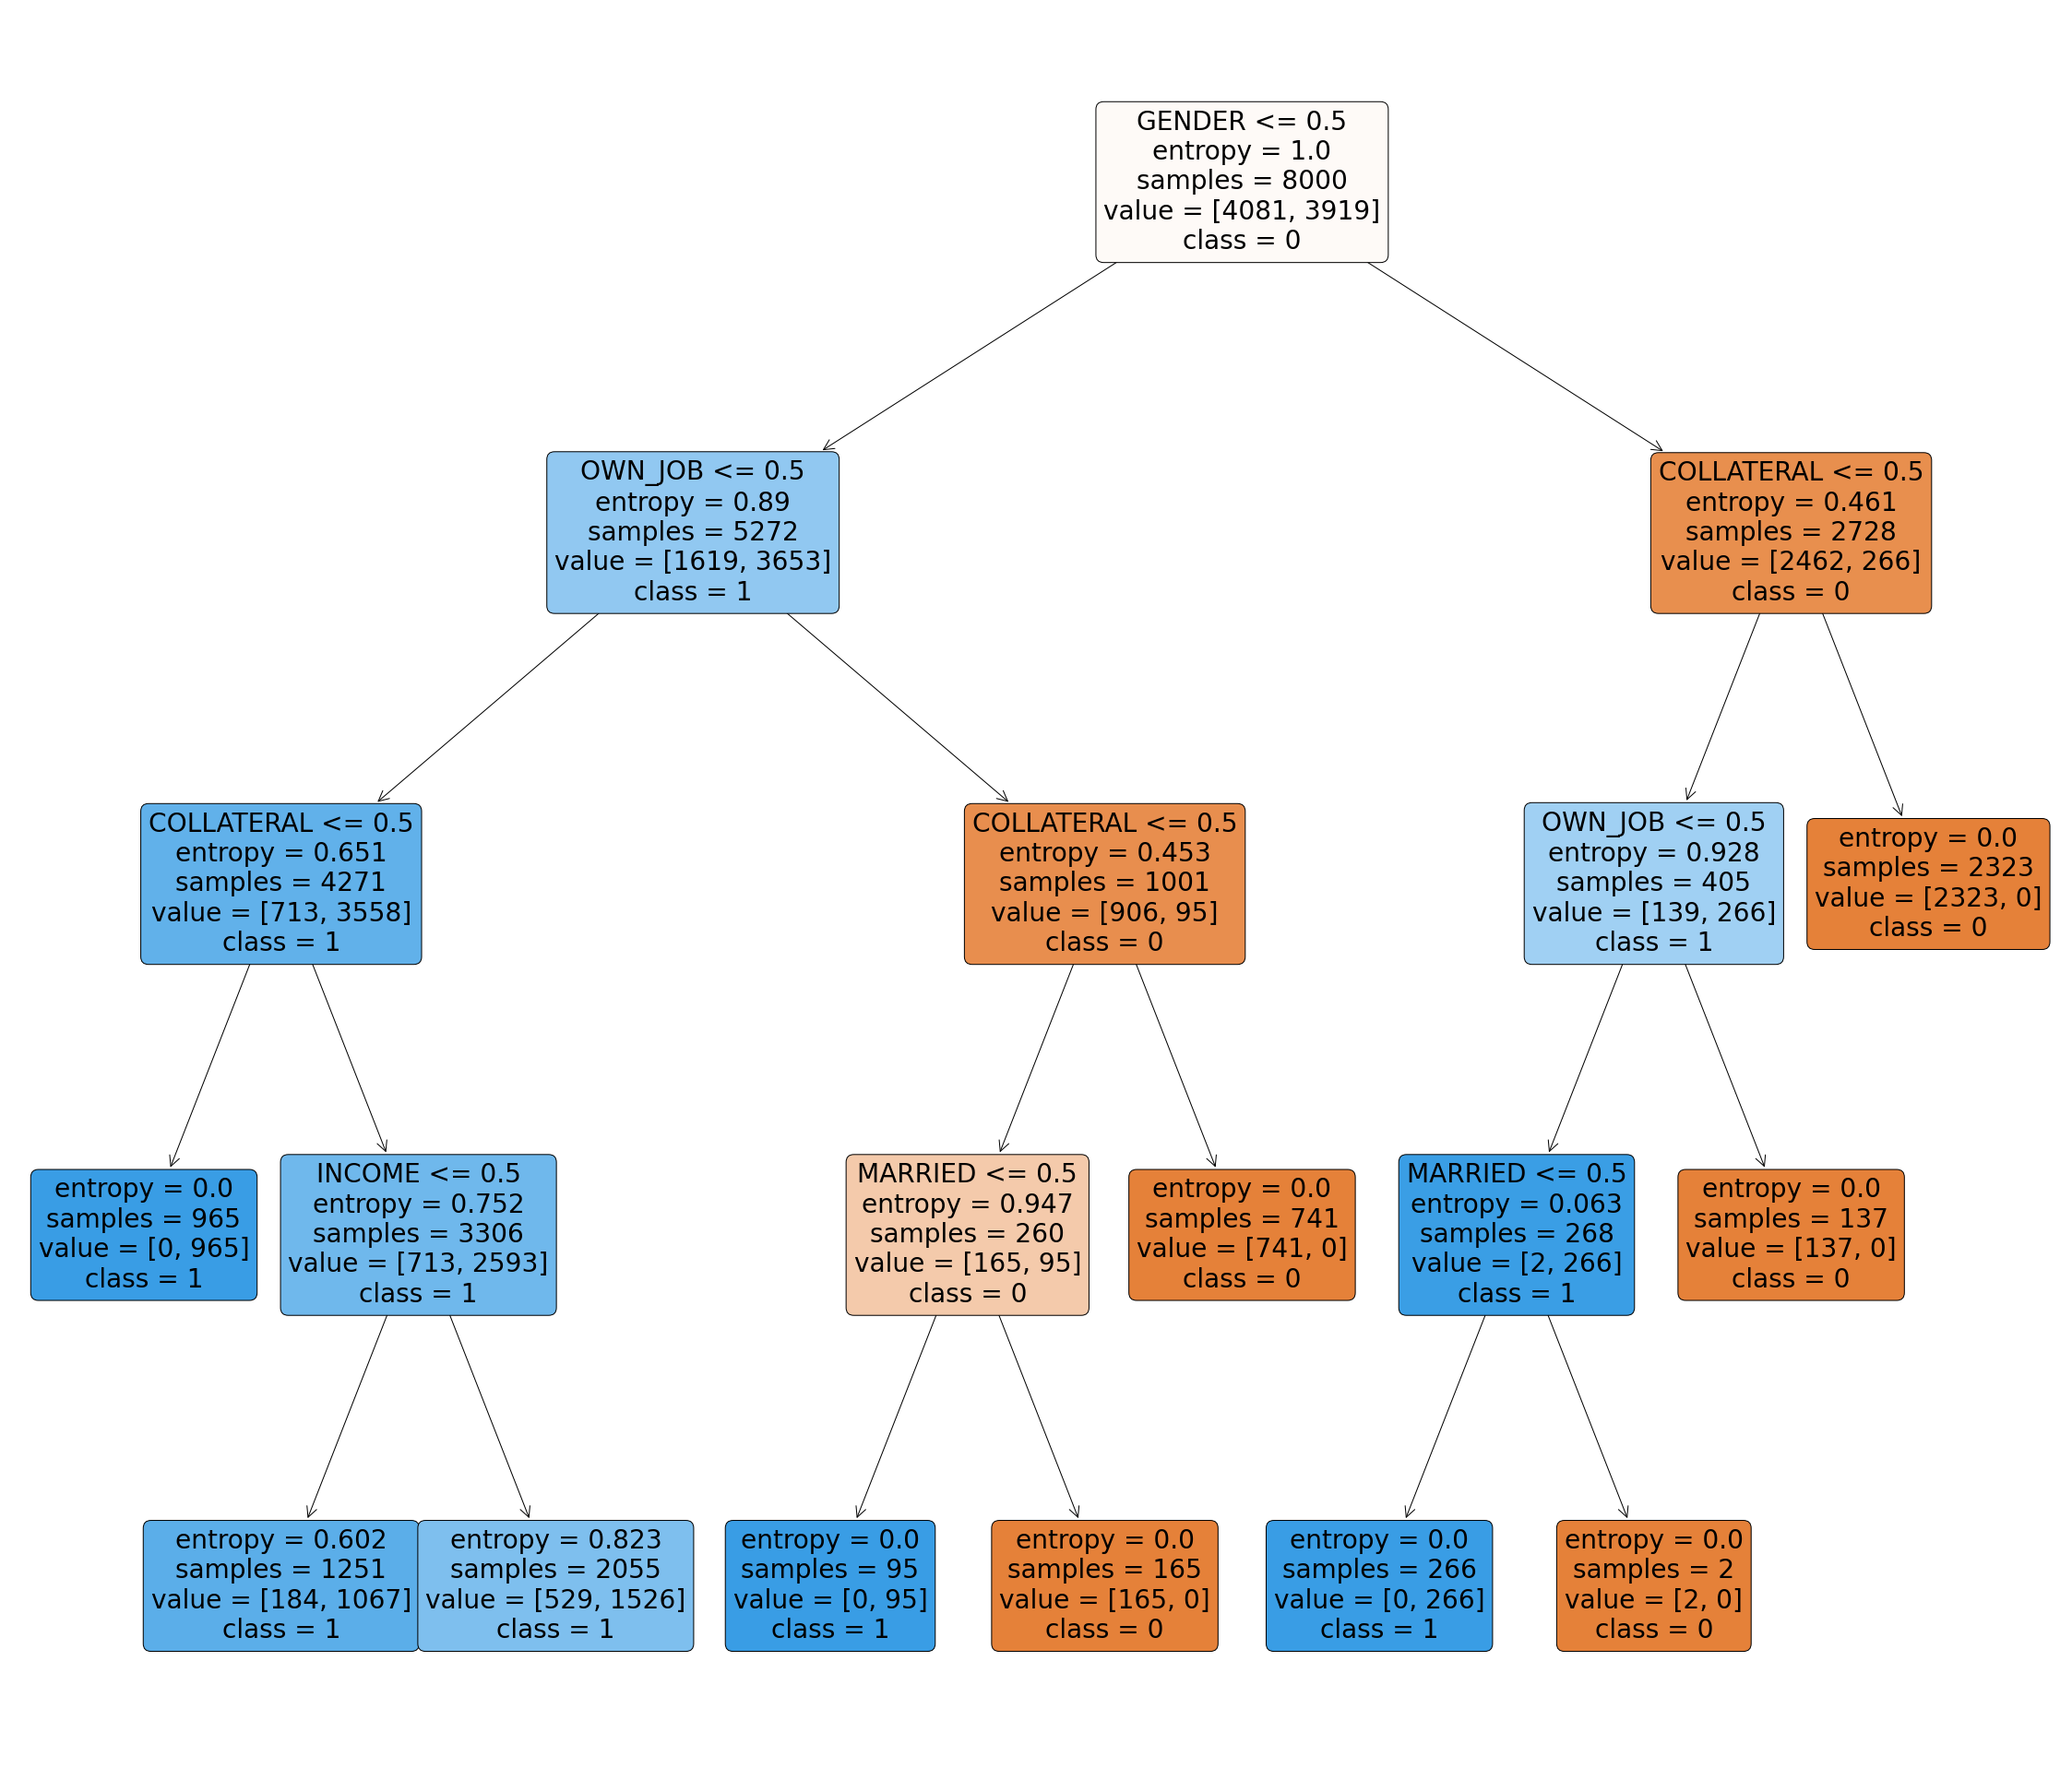

In [10]:
from sklearn import tree
fig = plt.figure(figsize=(40,35))
_ = tree.plot_tree(my_tree, 
                   feature_names=df.drop(columns=['TARGET']).columns,  
                   class_names=["0","1"],
                   rounded=True,
                   filled=True,
                   fontsize=28)
# plt.savefig('decisiontree_image.png')

***LOGISTIC REGRESSION***

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1020
           1       0.86      1.00      0.93       980

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

Logistic Regression Accuracy: 92.15%


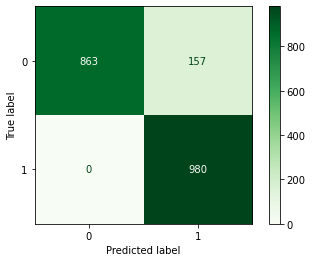

In [12]:
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_hat=lr.predict(X_test)
confusion_matrix(y_test,y_hat,labels=[1,0])
cm = confusion_matrix(y_test,y_hat)
plot_confusion_matrix(lr, X_test, y_test,cmap='Greens')
print(classification_report(y_test,y_hat))
print(f'Logistic Regression Accuracy: {round(100*accuracy_score(y_test,y_hat),2)}%')

In [13]:
importance_lr = lr.coef_[0]
features_importances_lr = pd.DataFrame({'FeatureName': df.columns[0:len(df.columns)-1], 'Logistic Regression Feature Importance': importance_lr})
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
1,COLLATERAL,-4.365954
0,GENDER,-3.546528
2,OWN_JOB,-3.436177
3,MARRIED,-3.432777
4,INCOME,-0.364668
